### Imports

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Loading and cleaning the data

In [109]:
df1 = pd.read_csv('./data/voc_2010-2022.csv')
df2 = pd.read_csv('./data/HYY_META.T336_1997-01-01--9999-09-09.csv')

In [110]:
# remove from df1 other columns than monoterpene_flux
# remove from df2 Unnamed
df1 = df1.drop(columns=['Unnamed: 0', 'methanol_flux', 'acetone_flux', 'acetaldehyde_flux'])
df2 = df2.drop(columns=['Unnamed: 0'])

In [111]:
# Convert time labels to datetime objects
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])

In [112]:
# keep only observations occurring during 11.00-14.00 each day
df1 = df1[(df1['Datetime'].dt.hour>=11) & (df1['Datetime'].dt.hour<=14)]
df2 = df2[(df2['Datetime'].dt.hour>=11) & (df2['Datetime'].dt.hour<=14)]

In [113]:
# Keep only the measurements after start_time
# Monoterpene data should be available
START_TIME = pd.to_datetime('2010-06-01')
df1 = df1[df1['Datetime'] >= START_TIME]
df2 = df2[df2['Datetime'] >= START_TIME]

In [114]:
# use daily median from measurements between 11-14
daily_df1 = df1.resample('D', on = 'Datetime').median().reset_index()
daily_df2 = df2.resample('D', on = 'Datetime').median().reset_index()

In [115]:
# combine with temperature data, use only years when monoterpene data available (already done above)
df_combined = pd.merge(daily_df1, daily_df2, on='Datetime', how='outer')

In [116]:
# drop lines where there is missing data
df_combined = df_combined.dropna()

### Step 1

The air-temperature data used here is T336 since I didn't find the 16.8m height data

In [121]:
# calculate the EF(t)
df_combined["EF_t"] = (df_combined["monoterpene_flux"] * np.exp(0.09*(25-df_combined["HYY_META.T336"]))) 

### Step 2

In [124]:
# Calculate the E(t) for air-temperature data-set
df_combined["E_t"] = df_combined["EF_t"] / np.exp(0.09*(25-df_combined["HYY_META.T336"]))

In [136]:
# Calculate the difference between the estimate and the observation
df_combined["Difference"] = (df_combined["monoterpene_flux"] - df_combined["E_t"])

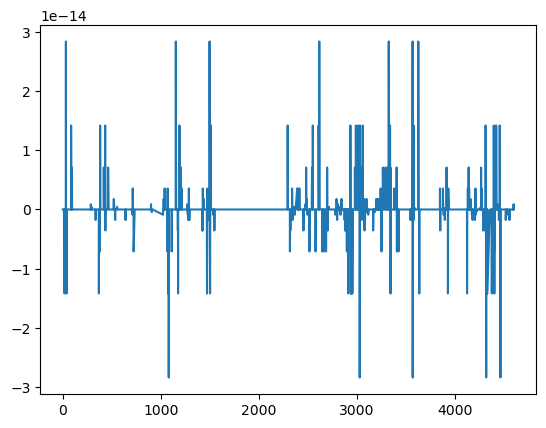

In [137]:
plt.plot(df_combined['Difference'])

The differences are very small, and it seems that there is something wrong in the calculations.